#Este notebook é uma demonstração de como utilizar o python para criar um modelo de árvore de decisão

Utilizaremos para esta finalidade 3 bibliotecas importantíssimas para manipulação de dados em python: pandas, scikit-learn e seaborn.

### Importando o dataset

In [ ]:
import pandas as pd
from sklearn import  datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Split do dataset

### Train Test Split

#### Nesta fase separamos o conjunto de dados em Treinamento e Teste, definindo o percentual que utilizaremos para teste e para treino do modelo

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y,test_size=0.3,random_state=0)

In [ ]:
X_test.shape

(45, 4)

## Árvore de decisão do scikit-learn

In [ ]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier(random_state=1234, criterion='entropy',min_samples_leaf=10)

cls.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       random_state=1234)

In [ ]:
y_pred = cls.predict(X_test)

In [ ]:
y_pred.shape

(45,)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(cls.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(cls.score(X_test, y_test)))

Training set score: 0.9619
Test set score: 0.9556


## Matriz de confusão

In [ ]:
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 16})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return

Acc teste:  0.9555555555555556
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]
None


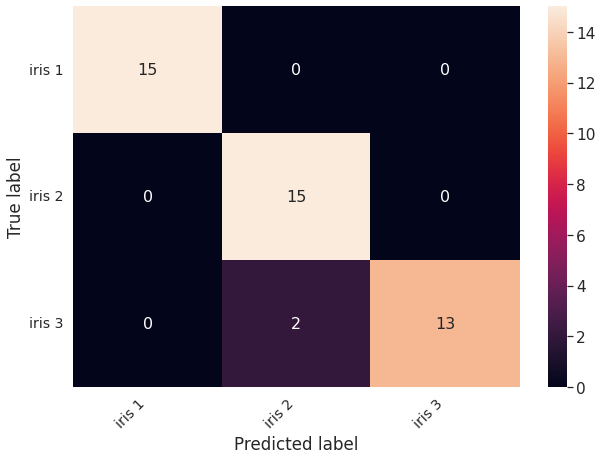

In [ ]:
print("Acc teste: ", accuracy_score(y_test,y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(plot_confusion_matrix(cf,class_names=["iris 1","iris 2","iris 3"]))

## Plot da árvore de decisão

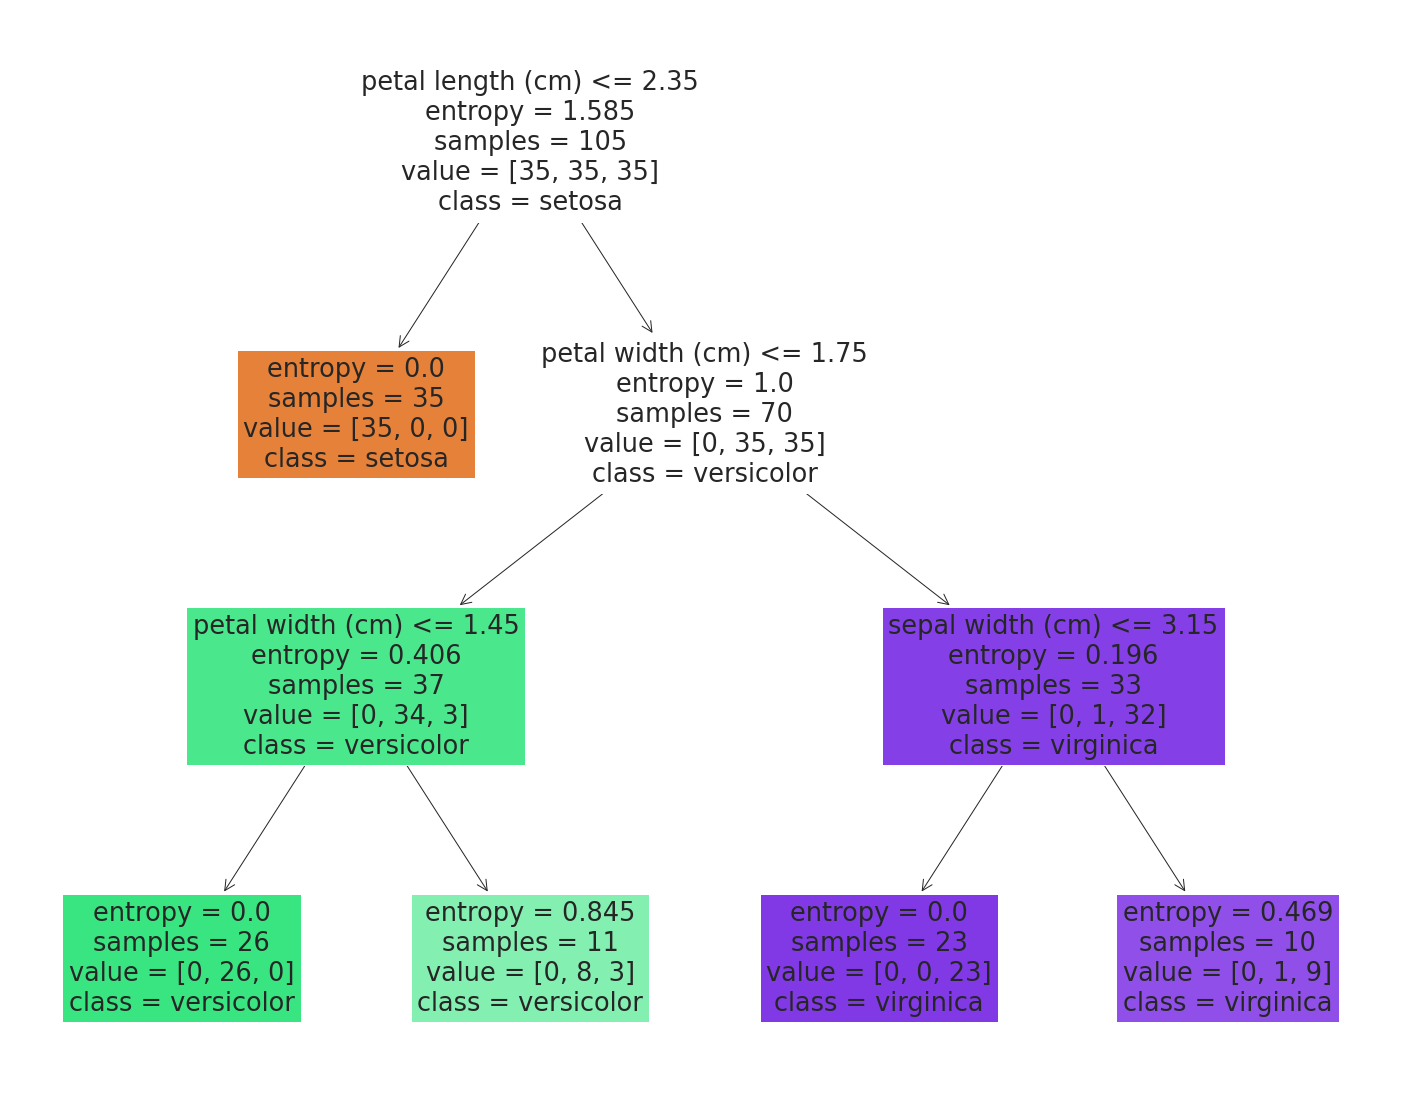

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cls,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
fig.savefig("decistion_tree.png")

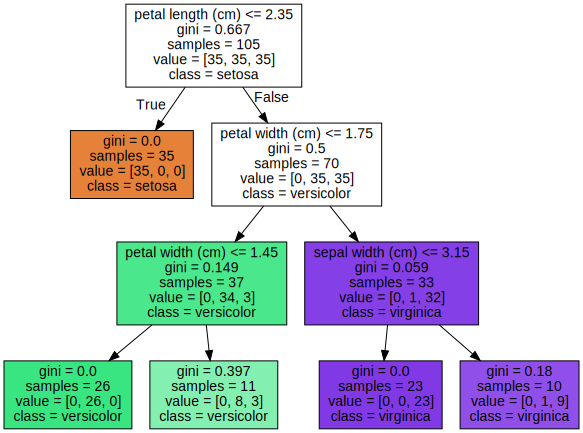

In [ ]:
import graphviz

dot_data = tree.export_graphviz(cls, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=e1d68dbd3193eaad6bee7eb9a414529ede2d77f95a2d4bb0ba97d3e5e2ff17a3
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


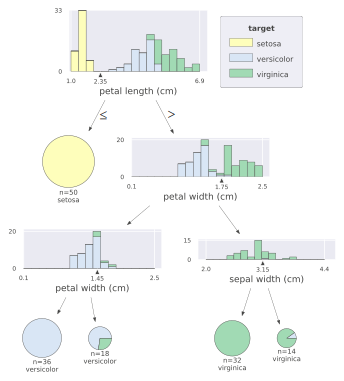

In [ ]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz
viz = dtreeviz(cls, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

## Report metrics

In [ ]:
from sklearn.metrics import classification_report

print("Relatório de classificação: \n", classification_report(y_test, y_pred))


Relatório de classificação: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
from sklearn.tree import DecisionTreeClassifier

help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

## Hiper-parametrização

In [ ]:
dataset = datasets.load_wine()
X = dataset.data
y = dataset.target



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y ,test_size=0.3,random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier(random_state=1234,min_samples_leaf=10)

cls.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=1234)

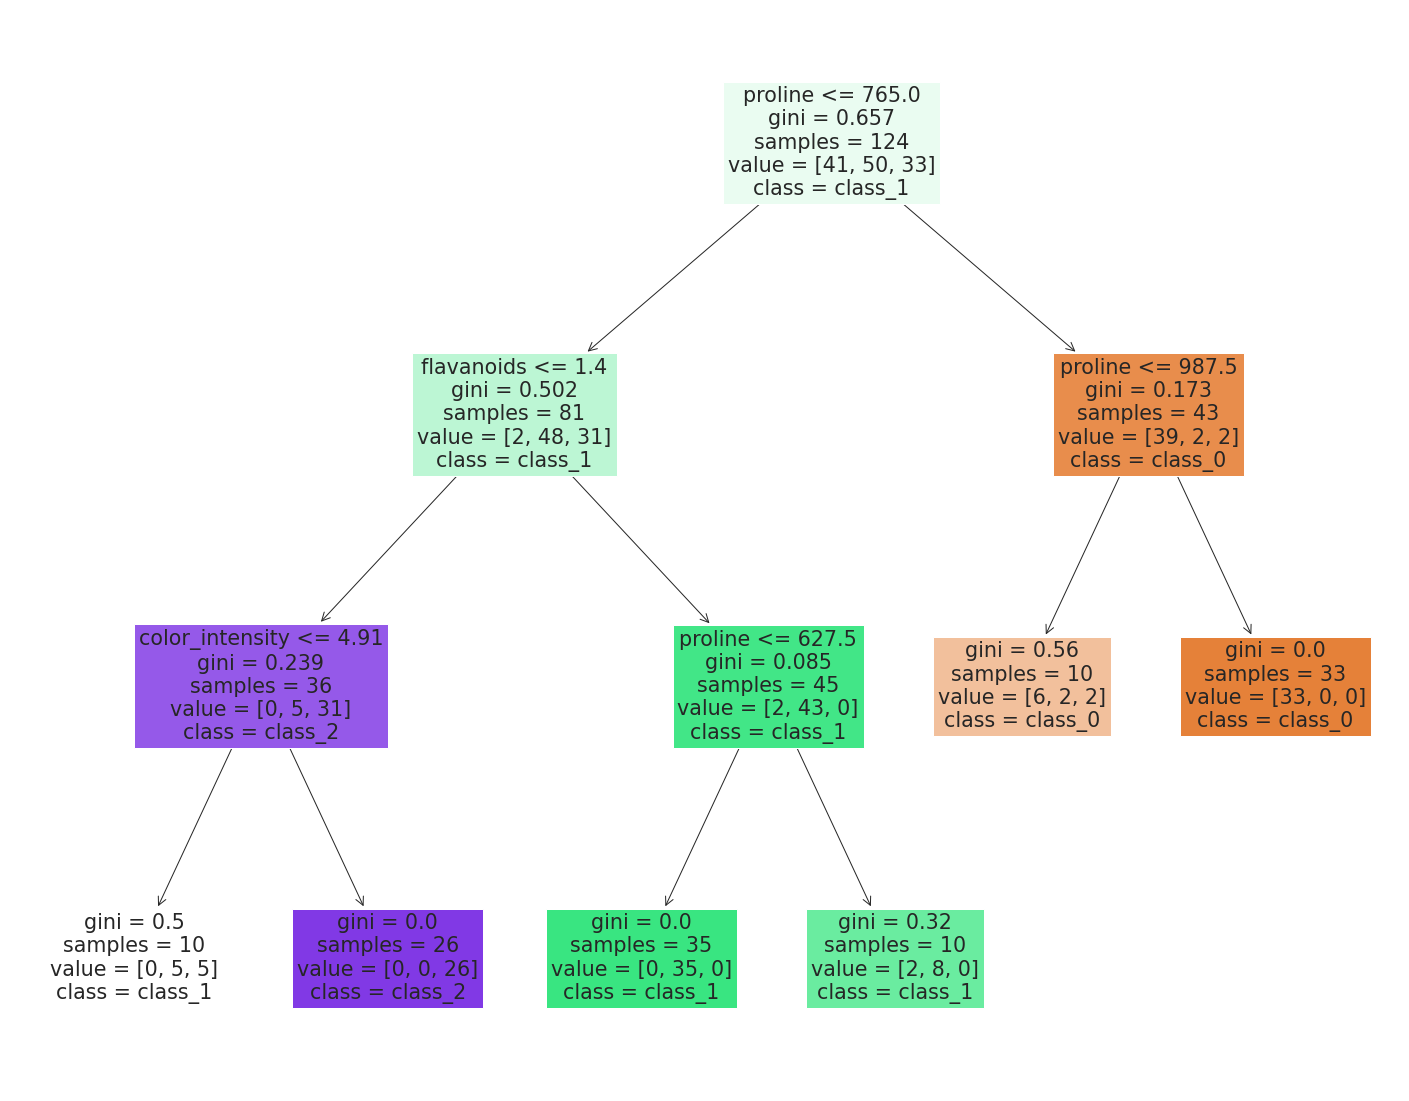

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cls,
                   feature_names=dataset.feature_names,
                   class_names=dataset.target_names,
                   filled=True)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(cls.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(cls.score(X_test, y_test)))

Training set score: 0.9113
Test set score: 0.8333


### Grid

In [ ]:
dec_tree = tree.DecisionTreeClassifier()


criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
min_samples_leaf = [2,4,6,8,10,12,14,16,18,20,22]

parameters = dict(criterion=criterion,
                      max_depth=max_depth,
                      min_samples_leaf = min_samples_leaf)

clf_GS = GridSearchCV(dec_tree, parameters, cv=10)

clf_GS.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 22]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print(); print(clf_GS.best_estimator_.get_params())

Best Criterion: entropy
Best max_depth: 10
Best min_samples_leaf: 2

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
y_pred = clf_GS.predict(X_test)

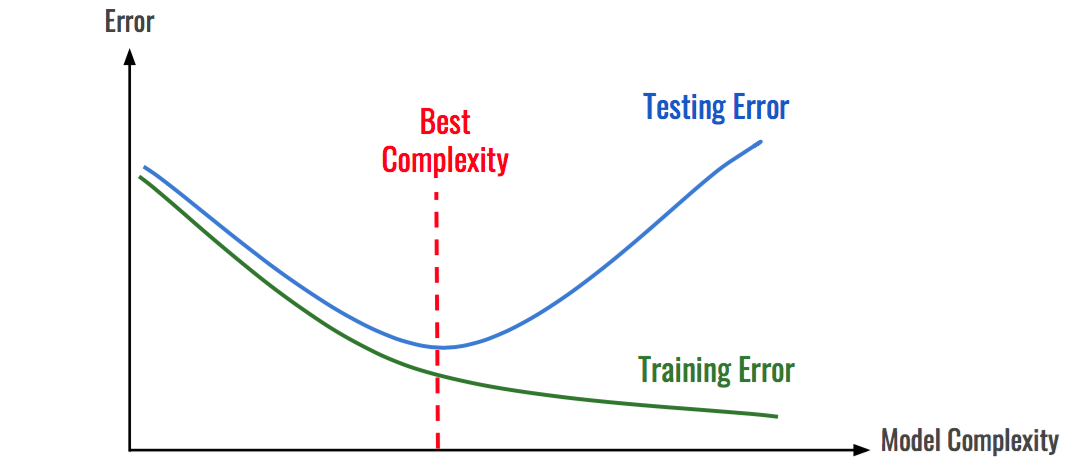